In the context of data types, "ordered" data refers to ordinal data.
Ordinal data is a type of categorical data with an order (or rank).
The order of these values is significant and typically represents some sort of hierarchy.
For example, ratings data (like "poor", "average", "good", "excellent") is ordinal
because there is a clear order to the categories.


1. **age** - Real
2. **sex** - Binary
3. **cp** - Chest pain type (4 values) - Nominal
4. **trestbps** - Resting blood age - Real
5. **chol** - Serum cholesterol (in mg/dl) - Real
6. **fbs** - Fasting blood sugar > 120 mg/dl - Binary
7. **restecg** - Resting electrocardiographic results (values 0,1,2) - Nominal
8. **thalach** - Maximum heart rate achieved - Real
9. **exang** - Exercise induced angina - Binary
10. **oldpeak** - Oldpeak = ST depression induced by exercise relative to rest - Real
11. **slope** - The slope of the peak exercise ST segment - Ordered
12. **ca** - Number of major vessels (0-3) colored by flouroscopy - Real
13. **thal** - Thal: 3 = normal; 6 = fixed defect; 7 = reversable defect - Nominal
14. **target**: 1 = no disease; 2 = presence of disease

In [60]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

detail = {"age": "Age", "sex": "Sex", "cp": "Chest Pain Type", "trestbps": "Resting Blood Pressure",
          "chol": "Serum Cholesterol", "fbs": "Fasting Blood Sugar", "restecg": "Resting ECG",
          "thalach": "Max Heart Rate", "exang": "Exercise Induced Angina", "oldpeak": "Oldpeak",
          "slope": "Slope", "ca": "Number of major vessels", "thal": "Thal", "target": "(0 - no disease, 1 - disease))"}

# Data Pre-Processing


In [83]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sns.set_theme(context="paper", font_scale=1.5, style="whitegrid", palette="Set2")

data = pd.read_csv("heart.dat", sep="\\s+", header=None)

data.columns = detail.keys()

# Check for missing values
print("Number of missing values:", data.isnull().sum().sum(), "\n")

# Check for duplicates
print("Number of duplicates:", data.duplicated().sum(), "\n")

noFeatures = data.shape[1]-1
print("Number of features: ", noFeatures, "\n")

continuousFeatures = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]

X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

print(X[continuousFeatures].head(), "\n")
# Apply scaler only to continuous variables
X[continuousFeatures] = StandardScaler().fit_transform(X[continuousFeatures])
#X[continuousFeatures] = MinMaxScaler().fit_transform(X[continuousFeatures])

print(X[continuousFeatures].head(), "\n")

one_hot_X = pd.get_dummies(X, columns=["cp", "restecg", "slope", "thal"])

print(one_hot_X.head())


Number of missing values: 0 

Number of duplicates: 0 

Number of features:  13 

    age  trestbps   chol  thalach  oldpeak   ca
0  70.0     130.0  322.0    109.0      2.4  3.0
1  67.0     115.0  564.0    160.0      1.6  0.0
2  57.0     124.0  261.0    141.0      0.3  0.0
3  64.0     128.0  263.0    105.0      0.2  1.0
4  74.0     120.0  269.0    121.0      0.2  1.0 

        age  trestbps      chol   thalach   oldpeak        ca
0  0.854167  0.339623  0.447489  0.290076  0.387097  1.000000
1  0.791667  0.198113  1.000000  0.679389  0.258065  0.000000
2  0.583333  0.283019  0.308219  0.534351  0.048387  0.000000
3  0.729167  0.320755  0.312785  0.259542  0.032258  0.333333
4  0.937500  0.245283  0.326484  0.381679  0.032258  0.333333 

        age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  \
0  0.854167  1.0  0.339623  0.447489  0.0  0.290076    0.0  0.387097   
1  0.791667  0.0  0.198113  1.000000  0.0  0.679389    0.0  0.258065   
2  0.583333  1.0  0.283019  0.308219  

# Feature Correlation

<Figure size 640x480 with 0 Axes>

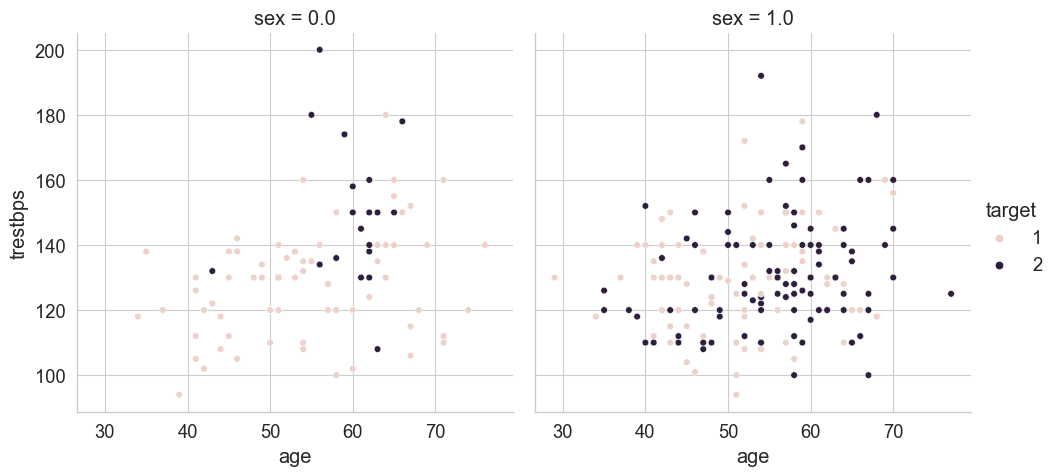

<Figure size 640x480 with 0 Axes>

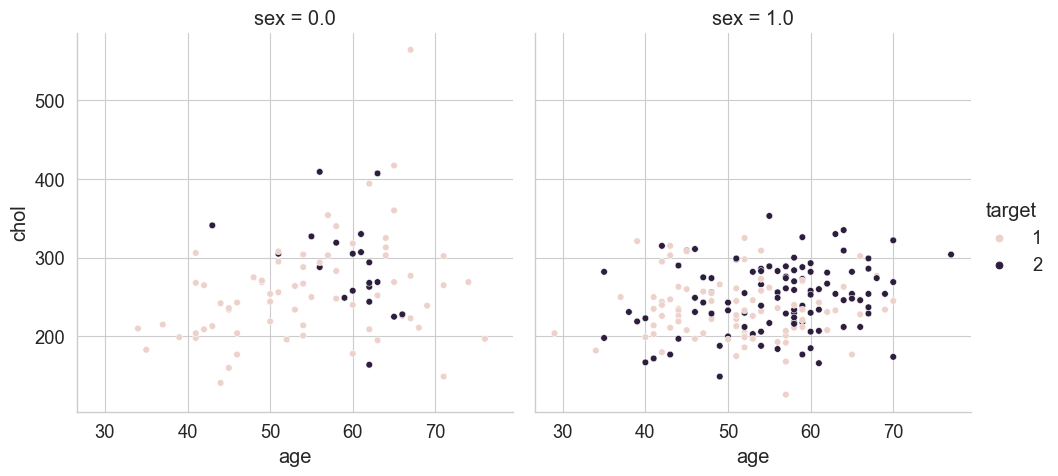

<Figure size 640x480 with 0 Axes>

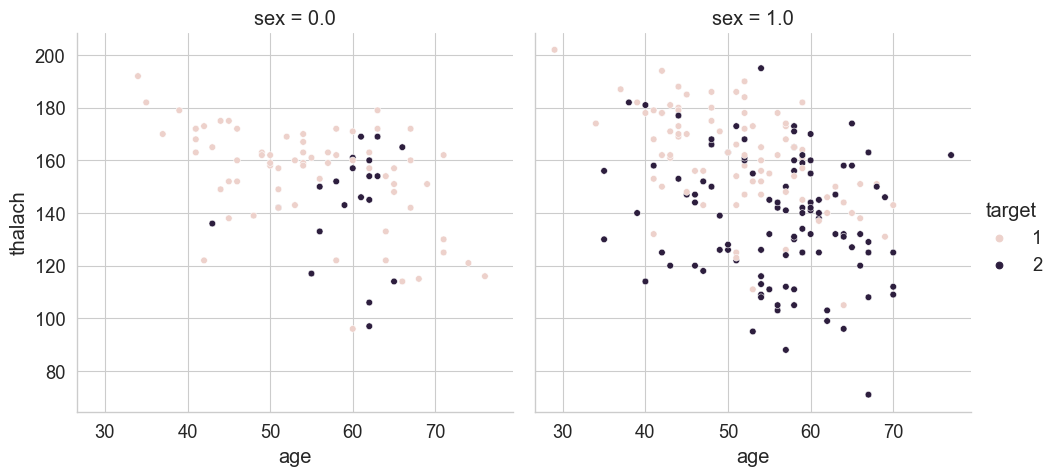

<Figure size 640x480 with 0 Axes>

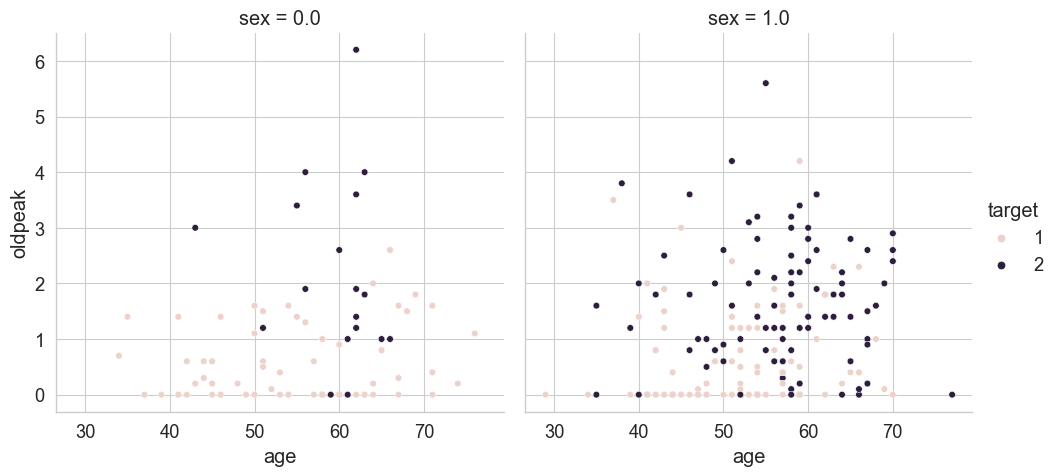

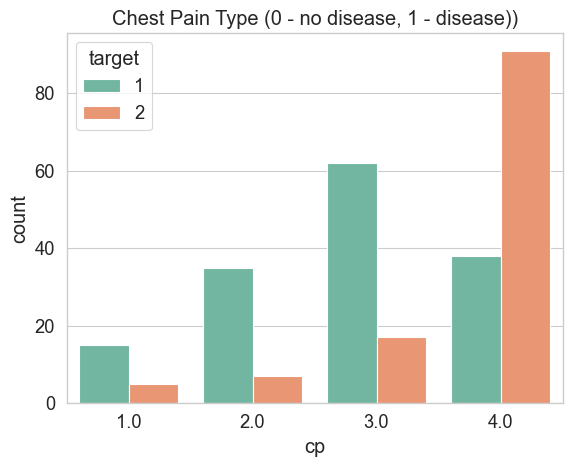

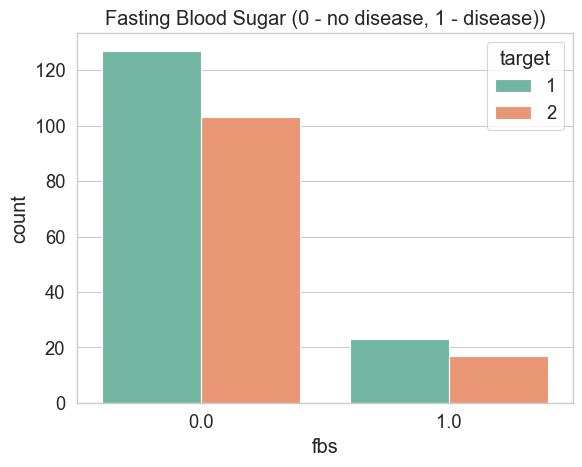

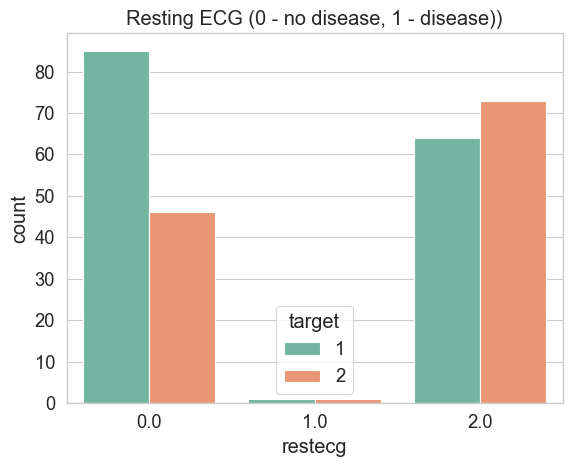

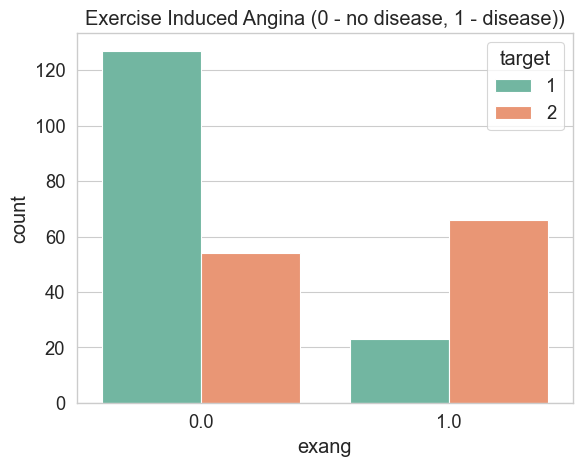

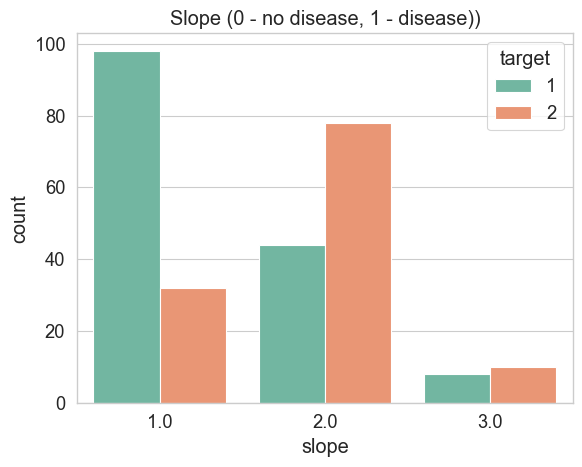

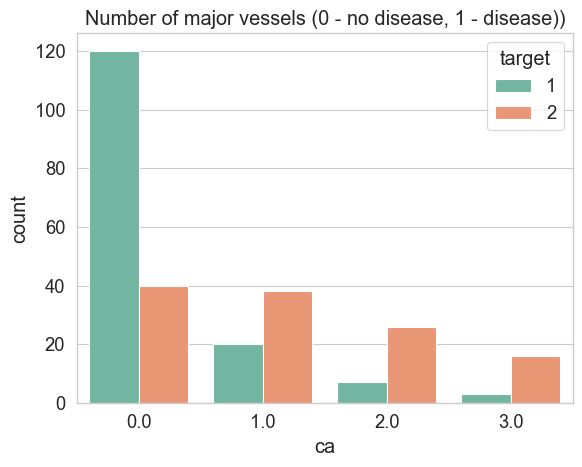

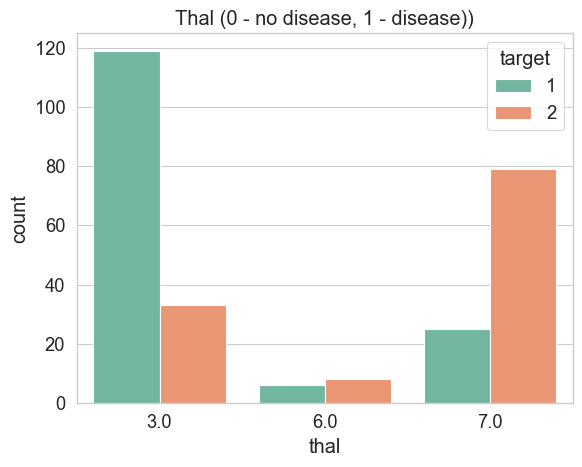

In [4]:
realFeatures = ("trestbps", "chol", "thalach", "oldpeak")
# considering ca ordered as only has 4 values
categoricalFeatures = ("cp", "fbs", "restecg", "exang", "slope", "thal", "ca")
extraFeatures = ("age", "sex", "target")

# Age vs. All Real for both Sexes
for feature in data.columns:
    if feature in realFeatures:
        plt.figure()
        sns.relplot(    
                data=data, x="age", y=feature, col="sex",
                hue="target"
        )
        plt.savefig(f"plots/{feature}_vs_age.png")

# Categorical Counts
for feature in data.columns:
    if feature in categoricalFeatures:
        plt.figure()
        sns.countplot(  # histplot if for continuous non categorical data
            data=data, x=feature, hue="target"
        )
        plt.title(f"{detail[feature]} {detail['target']}")
        plt.savefig(f"plots/{feature}_count.png")

# Categorical Normalized Counts
# for feature in data.columns:
#     if feature in categoricalFeatures:
#         # thanks copilot
#         proportions = data.groupby(feature)["target"].value_counts(normalize=True).rename("proportion").reset_index()

#         plt.figure()
#         sns.barplot(data=proportions, x=feature, y="proportion", hue="target")
#         plt.title(f"{detail[feature]} {detail['target']}")
#         plt.show()

# for feature in data.columns[:-1]:
#     plotter2v2(data, feature, "target")

# normalizer = StandardScaler()
# calculate and remove mean and standard deviation from the data
# data_scaled = pd.DataFrame(normalizer.fit_transform(data), columns=data.columns)



# print(data.head())
# sns.heatmap(data_scaled.corr(), annot=True, linewidths=2)
# plt.show()

# Naive Bayes

In [85]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

nb_results = cross_validate(GaussianNB(), X, Y, cv=5, scoring=["accuracy", "precision", "recall", "f1", "neg_log_loss"])
results_df = pd.DataFrame(nb_results)
print(results_df)


   fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1  \
0  0.003000    0.007028       0.814815        0.833333     0.833333  0.833333   
1  0.002001    0.006971       0.833333        0.838710     0.866667  0.852459   
2  0.002025    0.007969       0.888889        0.875000     0.933333  0.903226   
3  0.003036    0.005965       0.833333        0.838710     0.866667  0.852459   
4  0.001997    0.008003       0.833333        0.838710     0.866667  0.852459   

   test_neg_log_loss  
0          -0.778455  
1          -0.820856  
2          -0.333911  
3          -0.686468  
4          -0.527435  


# Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression

# Create empty lists to store the evaluation metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []


for random_state in range(5):
    X_train, X_test, y_train, y_test = train_test_split(one_hot_X, Y, test_size=0.2, random_state=random_state)
    # Dividir os dados em training data & Test data, de forma aleatória
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

    #Logistic Regression
    model = LogisticRegression()

    #Treinar o modelo Logistic Regression com a Training Data
    model.fit(X_train, Y_train)

    # Avaliação do Modelo

    #Accuracy on training data
    X_train_prediction=model.predict(X_train)
    training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
    print('Accuracy on Training Data: ', training_data_accuracy)

    #Accuracy on test data
    X_test_prediction=model.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    print('Accuracy on Test Data: ', test_data_accuracy)

    # Calculate evaluation metrics
    # pos_label referes to the HD presence class (the positive class)
    pos_label = 1
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=pos_label)
    recall = recall_score(y_test, y_pred, pos_label=pos_label)
    f1 = f1_score(y_test, y_pred, pos_label=pos_label)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Append the evaluation metrics to the respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)


# Sistema

# input_data = (52,1,0,125,212,0,1,168,0,1,2,2,3) # Estes valores são os da primeira linha do heart.csv

# input_data_as_numpy_array = np.asarray(input_data) #Converter a input data num array
# input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) #Reshape do array em uma linha em quantas colunas necessária para preservar o número original de elementos

# prediction = model.predict(input_data_reshaped)
# print(prediction)

# if(prediction[0]==0):
#     print('The patient does not have a Heart Disease')
# else:
#     print('The patient has a Heart Disease')


Accuracy on Training Data:  0.8518518518518519
Accuracy on Test Data:  0.7777777777777778
Accuracy on Training Data:  0.8518518518518519
Accuracy on Test Data:  0.7777777777777778
Accuracy on Training Data:  0.8518518518518519
Accuracy on Test Data:  0.7777777777777778
Accuracy on Training Data:  0.8518518518518519
Accuracy on Test Data:  0.7777777777777778
Accuracy on Training Data:  0.8518518518518519
Accuracy on Test Data:  0.7777777777777778
